<a href="https://colab.research.google.com/github/TrunnMosby/OCR_AdharCard_Identification/blob/main/OCR_Adharcard_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=f30a6f51a3fc28ab23bdc203278dbda53ae96859daed401eec9889ec4f668b94
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [2]:
!pip install easyocr

     |████████████████████████████████| 62.4MB 61kB/s 


In [3]:
import easyocr

In [4]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
output=reader.readtext('D1.jpg')

In [14]:
text=[]
position=[]

In [15]:
for i in (output):
  position.append(i[0])
  text.append(i[1])

In [36]:
DOB=[]
PAN=[]

In [56]:
import re
pattern=r'\d{2}.\d{2}.\d{4}'
pattern2=r'[A-Z]'
for i in text:
  if( len(i)==10 and re.search(pattern2,i)):
    PAN.append(i)
  elif(len(i)==10 and re.search(pattern,i)):
    DOB.append(i)

In [59]:
location=[]

In [96]:
dictionary=dict(zip(text,position))

In [106]:
for i,j in zip(dictionary.keys(),dictionary.values()):
  if(i in DOB):
    location.append(j)
  elif( i in PAN):
    location.append(j)
  

In [110]:
location[1]

[[68, 790], [218, 790], [218, 822], [68, 822]]

In [117]:
x_min1,y_min1=[min(i) for i in zip(*location[1])]
x_max1,y_max1=[max(i) for i in zip(*location[1])]

In [118]:
x_min2,y_min2=[min(i) for i in zip(*location[0])]
x_max2,y_max2=[max(i) for i in zip(*location[0])]

In [135]:
import matplotlib.pyplot as plt


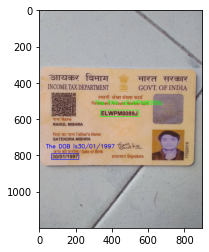

In [137]:
img=cv2.imread('D1.jpg')
cv2.rectangle(img,(x_min1,y_min1),(x_max1,y_max1),(0,0,255),2)
cv2.rectangle(img,(x_min2,y_min2),(x_max2,y_max2),(0,255,0),2)
cv2.putText(img,'The DOB is'+DOB[0],org=(x_min1-30,y_min1-30) ,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale= 1, color=(0, 0, 255),thickness= 2)
cv2.putText(img,'The PAN is'+PAN[0],org=(x_min2-30,y_min2-30) ,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale= 1, color=(0,  255,0),thickness= 2)
plt.imshow(img)
